<a href="https://colab.research.google.com/github/vikramrajeevreddy/Machine_Learning_HW/blob/main/HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial import distance
from sklearn.preprocessing import StandardScaler
import time
import math
from sklearn.cluster import KMeans
from collections import defaultdict
import numpy as np
from collections import defaultdict

from numpy import dot
from numpy.linalg import norm

In [25]:
def manhattan_distance(point1, point2):
    distance = 0
    for a,b in zip(point1, point2):
        distance += abs(a-b)
    return distance

In [4]:
data = [
    [3, 5],
    [3, 4],
    [2, 8],
    [2, 3],
    [6, 2],
    [6, 4],
    [7, 3],
    [7, 4],
    [8, 5],
    [7, 6]
]

In [5]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [6]:
kmeans.cluster_centers_

array([[6.83333333, 4.        ],
       [2.5       , 5.        ]])

In [26]:
def euclidean_distance(point1, point2):
    distance = 0
    for a,b in zip(point1, point2):
        distance += pow((a-b), 2)
    return math.sqrt(distance)

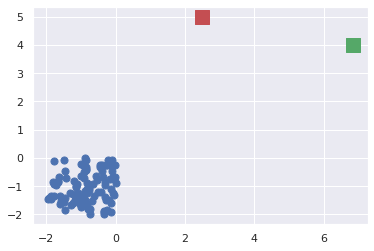

In [ ]:
plt.scatter(X[ : , 0], X[ : , 1], s =50, c='b')
plt.scatter(6.83333333, 4.        , s=200, c='g', marker='s')
plt.scatter(2.5      , 5.        , s=200, c='r', marker='s')
plt.show()

In [27]:
red_data_points = [(4.7, 3.2), (4.9, 3.1), (5.0, 3.0), (4.6, 2.9)]
blue_data_points = [(5.9, 3.2), (6.7, 3.1), (6.0, 3.0), (6.2, 2.8)]

distances = []
current_distance = 0
for red_point in red_data_points:
    for blue_point in blue_data_points:
        distances.append([euclidean_distance(red_point, blue_point), [red_point, blue_point]])
        current_distance += distances[-1][0]

distances.sort()

print("Q1: Distance between closest points is {} between points {} and {}".format(distances[0][0], distances[0][1][0], distances[0][1][1]))
print("Q2: Distance between farthest points is {} between points {} and {}".format(distances[-1][0], distances[-1][1][0], distances[-1][1][1]))
print("Q3: Average of all distances is {}".format(current_distance/len(distances)))

Q1: Distance between closest points is 0.9219544457292891 between points (5.0, 3.0) and (5.9, 3.2)
Q2: Distance between farthest points is 2.109502310972899 between points (4.6, 2.9) and (6.7, 3.1)
Q3: Average of all distances is 1.4128564854895742


In [28]:
def euclidean_distance(point1, point2):
    distance = 0
    for a,b in zip(point1, point2):
        distance += pow((a-b), 2)
    return math.sqrt(distance)

In [29]:
def cosine_similarity(point1, point2):
  A = np.array(point1)
  B = np.array(point2)
  dist = 1 - np.dot(A,B)/(np.linalg.norm(A)*np.linalg.norm(B))
  return dist

In [30]:
def jaccard(A, B):
    return 1 - (np.sum(np.minimum(A,B), axis = 0)/np.sum(np.maximum(A, B), axis = 0)) 

In [31]:
def stringsToNumbers(myList):
    for i in range(len(myList)):
        if (isValidNumberString(myList[i])):
            myList[i] = float(myList[i])
def isValidNumberString(s):
  if len(s) == 0:
    return False
  if  len(s) > 1 and s[0] == "-":
      s = s[1:]
  for c in s:
    if c not in "0123456789.":
      return False
  return True
def lineToTuple(line):
    # remove leading/trailing witespace and newlines
    cleanLine = line.strip()
    # get rid of quotes
    cleanLine = cleanLine.replace('"', '')
    # separate the fields
    lineList = cleanLine.split(",")
    # convert strings into numbers
    stringsToNumbers(lineList)
    lineTuple = tuple(lineList)
    return lineTuple

In [32]:
class KMeans:
  def __init__(self, n_clusters=3, max_iters=300, init_centroids=None, d_func=euclidean_distance, show_sse=False, show_first_centroid=False, centroid_stop=True):
    self.n_clusters = n_clusters
    self.max_iters = max_iters
    self.init_centroids = init_centroids
    self.d_func = d_func
    self.sse_list = []
    self.show_first_centroid = show_first_centroid
    self.show_sse = show_sse
    self.centroid_stop = centroid_stop

  def fit(self, data):
    start = time.time()
    if self.init_centroids is None:
      # Assign random points of data as centroids of size k (n_clusters)
      random_choice = np.random.choice(range(len(data)), self.n_clusters, replace=False)
      centroids = []

      for choice in random_choice:
        if isinstance(data[choice][-1], str):
          centroids.append(data[choice][:-1])
        else:
          centroids.append(data[choice])
      
      self.init_centroids = centroids
    
    for loop in range(self.max_iters): 
      clusters = defaultdict(list)
      sse = 0
      # Now, assign each point to nearest centroid cluster

      for point in data:
        temp_centroid = -1
        min_dist = 99999999
        for i, centroid in enumerate(self.init_centroids):
          if isinstance(point[-1], str):
            d = self.d_func(point[:-1], centroid)
          else:
            d = self.d_func(point, centroid)
          if d < min_dist:
            temp_centroid = i
            min_dist = d
        
        clusters[temp_centroid].append(point)

      prev_centroids = self.init_centroids.copy()
      # Now, recalculating the centroids
      for key in clusters.keys():
        cluster = clusters[key]
        self.init_centroids[key] = calculate_centroid(cluster)

      if loop == 1 and self.show_first_centroid == True:
        print("Centroids after first iteration: ", self.init_centroids)

      if self.centroid_stop == True and self.init_centroids == prev_centroids:
        break

      # Now, calculate SSE
      for key in clusters.keys():
        cluster = clusters[key]
        ce = self.init_centroids[key]

        for p in cluster:
          sse += euclidean_distance(ce, p)

      if self.show_sse == True and loop > 1 and self.sse_list[-1] <= sse:
        self.sse_list.pop()
        break

      self.sse_list.append(sse)

    print("Time taken:", time.time() - start)
    print("Number of iterations:", loop)
    return [self.init_centroids, clusters]

In [34]:
raw_data = loadCSV('data.csv')

In [33]:
def loadCSV(fileName):
    fileHandler = open(fileName, "rt")
    lines = fileHandler.readlines()
    fileHandler.close()
    dataset = []
    for line in lines:
        instance = lineToTuple(line)
        dataset.append(instance)
    return dataset

In [35]:
def calculate_centroid(cluster):
  n = len(cluster[0])
  if isinstance(cluster[0][-1], str):
    centroid = [0]*(n-1)

    for i in range(n-1):
      for point in cluster:
        centroid[i] += point[i]
      centroid[i] = centroid[i]/len(cluster)
  else:
    centroid = [0]*n

    for i in range(n):
      for point in cluster:
        centroid[i] += point[i]
      centroid[i] = centroid[i]/len(cluster)

  
  return centroid

In [36]:
def label_cluster(cluster):
  cl = defaultdict(int)
  for point in cluster:
    cl[point[-1]] += 1
  return cl

In [37]:
original_labels = dict(label_cluster(raw_data))

In [51]:
kmeans = KMeans(d_func=euclidean_distance,n_clusters=5)
[centroid_centers, clusters] = kmeans.fit(raw_data)

labels = {}

for i in range(10):
  labels[float(i)] = 0

for key in clusters:
  d = dict(label_cluster(clusters[key]))
  mx = 0
  s = 0
  label = ""
  for k in d:
    s += d[k]
    if d[k] > mx:
      mx = d[k]
      label = k
  labels[label] = mx


print("SSE =",kmeans.sse_list)
print("Original Labels: ", original_labels)
print("Predicted Labels: ", labels)

total = 0
mismatch = 0

for l in original_labels:
  total += original_labels[l]
  mismatch += abs(original_labels[l] - labels[l])

accuracy = (total - mismatch) / total

print("Accuracy =",accuracy*100)

Time taken: 234.0901153087616
Number of iterations: 21
SSE = [17506745.436864305, 17262174.965242956, 17074264.022219434, 16906889.801536106, 16751369.502986392, 16644136.392342426, 16594503.995645383, 16575491.7875031, 16565851.183925679, 16561213.561822284, 16558445.691918869, 16556773.446485404, 16556032.831436686, 16555537.187386788, 16555142.877563113, 16555021.401728457, 16554924.052405765, 16554752.146906376, 16554693.77151413, 16554693.48862377, 16554654.356040971]
Original Labels:  {7.0: 1028, 2.0: 1032, 1.0: 1135, 0.0: 980, 4.0: 982, 9.0: 1009, 5.0: 892, 6.0: 958, 3.0: 1010, 8.0: 974}
Predicted Labels:  {0.0: 849, 1.0: 1126, 2.0: 0, 3.0: 865, 4.0: 0, 5.0: 0, 6.0: 801, 7.0: 0, 8.0: 0, 9.0: 882}
Accuracy = 45.23


In [49]:
kmeans = KMeans(d_func=cosine_similarity,n_clusters=5)
[centroid_centers, clusters] = kmeans.fit(raw_data)

labels = {}

for i in range(10):
  labels[float(i)] = 0

for key in clusters:
  d = dict(label_cluster(clusters[key]))
  mx = 0
  s = 0
  label = ""
  for k in d:
    s += d[k]
    if d[k] > mx:
      mx = d[k]
      label = k
  labels[label] = mx


print("SSE =",kmeans.sse_list)
print("Original Labels: ", original_labels)
print("Predicted Labels: ", labels)

total = 0
mismatch = 0

for l in original_labels:
  total += original_labels[l]
  mismatch += abs(original_labels[l] - labels[l])

accuracy = (total - mismatch) / total

print("Accuracy =",accuracy*100)

Time taken: 303.2703495025635
Number of iterations: 36
SSE = [17345984.24874821, 17027535.957346193, 16916206.349344987, 16847535.338691328, 16800790.966650244, 16776098.13067269, 16752487.409775645, 16725318.619598875, 16690629.265972495, 16659131.960347608, 16632788.857738392, 16605611.187372338, 16590538.83873495, 16584442.620673075, 16581416.4668179, 16580063.302847933, 16579613.094280131, 16579478.446699435, 16579805.185784243, 16579619.899365643, 16579615.771106346, 16579285.5413393, 16579039.854590686, 16579204.420255573, 16579188.032147361, 16578780.558098746, 16578472.280045204, 16578392.861677488, 16578500.18631882, 16578730.159752524, 16578849.852708848, 16578919.082991375, 16578974.314015055, 16578912.437099133, 16579042.307578806, 16578944.567070687]
Original Labels:  {7.0: 1028, 2.0: 1032, 1.0: 1135, 0.0: 980, 4.0: 982, 9.0: 1009, 5.0: 892, 6.0: 958, 3.0: 1010, 8.0: 974}
Predicted Labels:  {0.0: 895, 1.0: 1117, 2.0: 0, 3.0: 914, 4.0: 0, 5.0: 0, 6.0: 828, 7.0: 0, 8.0: 0, 9

In [50]:
kmeans = KMeans(d_func=jaccard,n_clusters=5)
[centroid_centers, clusters] = kmeans.fit(raw_data)

labels = {}

for i in range(10):
  labels[float(i)] = 0

for key in clusters:
  d = dict(label_cluster(clusters[key]))
  mx = 0
  s = 0
  label = ""
  for k in d:
    s += d[k]
    if d[k] > mx:
      mx = d[k]
      label = k
  labels[label] = mx


print("SSE =",kmeans.sse_list)
print("Original Labels: ", original_labels)
print("Predicted Labels: ", labels)

total = 0
mismatch = 0

for l in original_labels:
  total += original_labels[l]
  mismatch += abs(original_labels[l] - labels[l])

accuracy = (total - mismatch) / total

print("Accuracy =",accuracy*100)

Time taken: 345.8383288383484
Number of iterations: 30
SSE = [17226159.33493876, 17041414.635203317, 16954619.889128372, 16833459.907592505, 16713173.926878525, 16654008.313662, 16626045.37285285, 16615450.927524537, 16607732.528508468, 16604456.601885682, 16600509.761210797, 16596348.376577271, 16594557.92522823, 16592742.081779016, 16591297.10832743, 16588793.904223979, 16587971.574938318, 16587041.21236794, 16585756.457853375, 16584756.046589032, 16584786.300018132, 16584170.224718694, 16583434.45594712, 16583060.740748549, 16582974.771440577, 16582937.903180398, 16582583.65208652, 16582519.005679972, 16582723.491040573, 16582808.677853413]
Original Labels:  {7.0: 1028, 2.0: 1032, 1.0: 1135, 0.0: 980, 4.0: 982, 9.0: 1009, 5.0: 892, 6.0: 958, 3.0: 1010, 8.0: 974}
Predicted Labels:  {0.0: 936, 1.0: 1108, 2.0: 0, 3.0: 919, 4.0: 0, 5.0: 0, 6.0: 775, 7.0: 885, 8.0: 0, 9.0: 0}
Accuracy = 46.23


In [112]:
kmeans = KMeans(centroid_stop=True,show_sse=True,max_iters=501)
[centroid_centers, clusters] = kmeans.fit(raw_data)
print(kmeans.sse_list)

Time taken: 204.43094301223755
Number of iterations: 26
[17721210.728515826, 17479791.437127735, 17360500.214024268, 17304922.42515292, 17277127.827383798, 17265396.310464825, 17259112.94504351, 17253849.743497353, 17249848.31409398, 17246585.98665353, 17245016.410147745, 17243554.161447246, 17242477.398491204, 17241573.93924287, 17241037.049631543, 17240613.540559664, 17240337.89951129, 17240044.836454663, 17239856.340292197, 17239660.36202287, 17239537.328681704, 17239461.939170454, 17239407.95822504, 17239358.469305046, 17239296.438103855, 17239267.488343548]


In [113]:
kmeans = KMeans(centroid_stop=True,show_sse=True,max_iters=501,d_func=cosine_similarity)
[centroid_centers, clusters] = kmeans.fit(raw_data)
print(kmeans.sse_list)

Time taken: 52.62435722351074
Number of iterations: 8
[17685074.478428356, 17436264.442477655, 17354851.273755252, 17316416.848664396, 17292784.401099138, 17279216.63731182, 17272919.335961696]


In [114]:
kmeans = KMeans(centroid_stop=True,show_sse=True,max_iters=501,d_func=jaccard)
[centroid_centers, clusters] = kmeans.fit(raw_data)
print(kmeans.sse_list)

Time taken: 173.9016978740692
Number of iterations: 21
[17828932.22192789, 17610232.88221706, 17484126.446981702, 17392376.927527104, 17325650.594040122, 17288791.678045716, 17270447.124571394, 17260295.47383955, 17254547.952441584, 17249661.665974997, 17245746.184838887, 17242316.875541426, 17238494.92852124, 17234758.574151326, 17231885.106899027, 17229265.730760023, 17227901.015294135, 17226990.35126179, 17226670.0309193, 17226554.73358698]


In [20]:
kmeans = KMeans(centroid_stop=True)
[centroid_centers, clusters] = kmeans.fit(raw_data)
print(kmeans.sse_list)

Time taken: 93.22810816764832
Number of iterations: 11
[17560941.977719754, 17289602.96801829, 17248727.023307316, 17241663.123229053, 17240084.508844864, 17239437.384597138, 17239285.01345343, 17239031.148554895, 17238941.963576466, 17238888.8774044, 17238938.148621753]


In [23]:
kmeans = KMeans(centroid_stop=True,d_func=cosine_similarity)
[centroid_centers, clusters] = kmeans.fit(raw_data)
print(kmeans.sse_list)

Time taken: 132.18549418449402
Number of iterations: 20
[17767016.839136012, 17615503.91917737, 17541841.742146205, 17464956.157789826, 17382500.179035395, 17331113.718015417, 17304545.532613046, 17294462.55681448, 17289414.16783334, 17285719.74368933, 17284735.925276786, 17283972.235463463, 17283330.97633717, 17283068.2990509, 17282866.696563978, 17282539.339762717, 17282332.54928156, 17282114.868547495, 17282231.334992915, 17282232.818809435]


In [22]:
kmeans = KMeans(centroid_stop=True,d_func=jaccard)
[centroid_centers, clusters] = kmeans.fit(raw_data)
print(kmeans.sse_list)

Time taken: 210.30316615104675
Number of iterations: 25
[17855694.295734636, 17531173.22434868, 17380722.683575623, 17302239.55476812, 17271441.480056208, 17258017.627916798, 17249822.79960088, 17244384.363355394, 17240115.855033465, 17235891.620741535, 17232583.32207052, 17230193.06930943, 17228419.040385514, 17227385.931556728, 17226934.114456795, 17226570.564058565, 17226322.06906246, 17226325.296421558, 17226339.309781637, 17226530.636024907, 17226484.176343523, 17226390.635563128, 17226315.772921536, 17226330.94609749, 17226348.481849335]


In [39]:
kmeans = KMeans(centroid_stop=False,max_iters=101)
[centroid_centers, clusters] = kmeans.fit(raw_data)
print(kmeans.sse_list)

Time taken: 777.8618021011353
Number of iterations: 100
[17641370.455040425, 17389182.432408452, 17321313.23064756, 17284788.545742378, 17266306.573259804, 17256390.96832387, 17250576.03687106, 17246786.469990563, 17243986.087875023, 17242464.42533378, 17241362.9338883, 17240618.313100286, 17240252.32995103, 17240001.643740855, 17239804.42504158, 17239696.308787446, 17239563.31530902, 17239487.354880046, 17239406.594708193, 17239285.152535643, 17239214.05451505, 17239169.250602305, 17239116.611387707, 17239116.611387707, 17239116.611387707, 17239116.611387707, 17239116.611387707, 17239116.611387707, 17239116.611387707, 17239116.611387707, 17239116.611387707, 17239116.611387707, 17239116.611387707, 17239116.611387707, 17239116.611387707, 17239116.611387707, 17239116.611387707, 17239116.611387707, 17239116.611387707, 17239116.611387707, 17239116.611387707, 17239116.611387707, 17239116.611387707, 17239116.611387707, 17239116.611387707, 17239116.611387707, 17239116.611387707, 17239116.6113

In [40]:
kmeans = KMeans(centroid_stop=False,max_iters=101, d_func=cosine_similarity)
[centroid_centers, clusters] = kmeans.fit(raw_data)
print(kmeans.sse_list)

Time taken: 639.2743878364563
Number of iterations: 100
[17639338.17977323, 17506208.950211946, 17438246.429532934, 17396291.64834485, 17376823.61490656, 17365516.52462561, 17356358.12596099, 17347868.10079925, 17337854.94023605, 17328348.044990603, 17316515.14965268, 17303988.21080476, 17292521.644906532, 17282757.25794488, 17275812.436098218, 17273067.269981273, 17274529.833272096, 17275152.04471835, 17275774.151323427, 17276784.331979465, 17276846.504617494, 17277294.96234692, 17277381.130470958, 17277567.876711585, 17278320.10301951, 17278654.07215067, 17278707.83649828, 17279457.43899651, 17279544.945797164, 17279573.06435754, 17279614.659648303, 17279614.659648303, 17279614.659648303, 17279614.659648303, 17279614.659648303, 17279614.659648303, 17279614.659648303, 17279614.659648303, 17279614.659648303, 17279614.659648303, 17279614.659648303, 17279614.659648303, 17279614.659648303, 17279614.659648303, 17279614.659648303, 17279614.659648303, 17279614.659648303, 17279614.659648303, 

In [46]:
kmeans = KMeans(centroid_stop=False, max_iters=101,d_func=jaccard)
[centroid_centers, clusters] = kmeans.fit(raw_data)
print(kmeans.sse_list)

KeyboardInterrupt: ignored

In [43]:
kmeans = KMeans(centroid_stop=False,show_sse=True)
[centroid_centers, clusters] = kmeans.fit(raw_data)
print(kmeans.sse_list)

Time taken: 208.8012135028839
Number of iterations: 26
[17798991.187625736, 17555401.006838974, 17477390.395360995, 17440635.71613068, 17423818.57947928, 17416196.58562041, 17411334.098805375, 17406471.748255845, 17402873.309625704, 17399173.162614465, 17395499.758105367, 17391914.219803512, 17387712.313792598, 17383926.885657527, 17380415.49165239, 17377197.413949735, 17374754.562246773, 17372644.494997907, 17369989.72289451, 17366916.736112095, 17363115.490948338, 17360005.01171102, 17357875.583919674, 17356660.27041564, 17356300.65310551]


In [44]:
kmeans = KMeans(centroid_stop=False,show_sse=True,d_func=cosine_similarity)
[centroid_centers, clusters] = kmeans.fit(raw_data)
print(kmeans.sse_list)

Time taken: 102.71699047088623
Number of iterations: 15
[17915649.279711954, 17682111.74378824, 17599758.695512053, 17567681.33244379, 17544120.41680803, 17520356.812931653, 17491668.21694896, 17447936.900308806, 17386704.957547557, 17323546.7808935, 17289818.970776048, 17279921.09192021, 17278692.95630157, 17278666.56815716]


In [45]:
kmeans = KMeans(centroid_stop=False,show_sse=True,d_func=jaccard)
[centroid_centers, clusters] = kmeans.fit(raw_data)
print(kmeans.sse_list)

Time taken: 153.44420337677002
Number of iterations: 18
[17867080.301349018, 17548370.697184425, 17385160.52644045, 17309041.471761588, 17270426.5786878, 17255905.63987991, 17249487.014865313, 17245915.597938873, 17242468.091435123, 17239701.171811525, 17235909.578404836, 17231943.74340216, 17229115.37058356, 17227709.200049687, 17226818.47011934, 17226706.722128518, 17226336.054273196]
